<a href="https://colab.research.google.com/github/invegat/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U matplotlib

Requirement already up-to-date: matplotlib in /usr/local/lib/python3.6/dist-packages (3.0.2)


In [138]:
%matplotlib inline  
# %matplotlib notebook
# %pylab
import matplotlib
matplotlib._version.sys.version

'3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [141]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
y = df.price
X = df.drop('price', inplace=False, axis=1)

## 1.2 Split the data into test and train datasets using train_test_split

In [143]:

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.5, random_state=42)
X_train.shape

(4247, 8)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
# X = sm.add_constant(X_train)

# model = sm.OLS(Y_train, X).fit()
# predictions = model.predict(X) 

# print_model = model.summary()


In [0]:
model = LinearRegression().fit(X_train, Y_train)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [145]:
print(f'intercept {model.intercept_}')
for c,n in zip(model.coef_,X_train.columns):
  print(f'{n}: {c}')  

intercept -2184591.0115608736
make: -35.224794837138774
body: -1672.11973554938
mileage: -37.12848398637675
engV: 269.6158254360521
engType: -1284.7437596238408
registration: 4649.462253388958
year: 1098.2829573042409
drive: 7886.890791475622


## 1.5 Use the test data to make predictions

In [0]:
# X = sm.add_constant(X_test)

# model = sm.OLS(Y_test, X).fit()
# predictions_test = model.predict(X) 

# print_model_test = model.summary()
# print(print_model_test)

In [147]:
test_model = LinearRegression().fit(X_test, Y_test)
y_test_predict = test_model.predict(X_test)
print(f'intercept {test_model.intercept_}')
for c,n in zip(test_model.coef_,X_test.columns):
  print(f'{n}: {c}')

intercept -2425297.4766236334
make: -33.84756582425063
body: -1976.8152031426525
mileage: -44.875001812652954
engV: 285.101583790629
engType: -1006.3680823173858
registration: 4621.031003404159
year: 1218.8557381488806
drive: 9069.814208519676


## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [148]:
MSE = mean_squared_error(Y_test, y_test_predict)

RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))


R2 = r2_score(Y_test, y_test_predict)

print(f'Root-Mean-Square is {RMSE} R² is {R2}')

Root-Mean-Square is 22387.7485851517 R² is 0.2747936926683979


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

For the Training Data +1 year  adds 1098.2830  to the price, For the Test Data +1 year adds 1218.8557 to the price


## 1.8 How should we interpret the Root-Mean-Square Error?

The Root-Mean-Square Error measures the accuracy of the "price" prediction. 


## 1.9 How should we interpret the $R^2$?

An R² between 0 and 1 indicates the extent to which the 'price' variable is predictable from the other (independent) columns.  The low  R² value 0.2747936926683979 shows that that there are problems with the data causing large errors.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df.price)

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

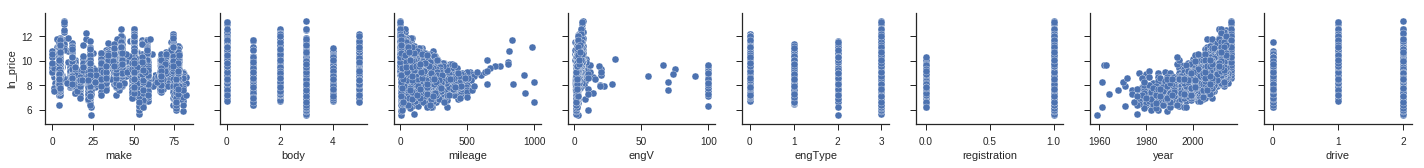

In [150]:
sns.set(style='ticks', color_codes=True)
columns = df.columns.drop(['price', 'ln_price'])
sns.pairplot(data=df,
                  y_vars=['ln_price'],
                  x_vars=columns);

## 2.3 If appropriate, create any polynomial features. 

In [0]:
df['year_squared'] = np.power(df.year,2)

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:

# price = df['ln_price']
# dff = df.drop(['price', 'ln_price'], inplace=False, axis=1)
# X = sm.add_constant(dff)
# model = sm.OLS(price, X).fit()
# predictions = model.predict(X) 

# MSE = mean_squared_error(price, predictions)

# RMSE = (np.sqrt(mean_squared_error(price, predictions)))


# R2 = r2_score(price, predictions)

# print(f'Root-Mean-Square is {RMSE} R² is {R2}')
# print_model= model.summary()
# print(print_model)

In [153]:
price = df['ln_price']
dff = df.drop(['price', 'ln_price'], inplace=False, axis=1)
model = LinearRegression().fit(dff, price)
predictions = model.predict(dff) 

MSE = mean_squared_error(price, predictions)

RMSE = (np.sqrt(mean_squared_error(price, predictions)))


R2 = r2_score(price, predictions)

print(f'Root-Mean-Square is {RMSE} R² is {R2}')
print(f'intercept {model.intercept_}')
for c,n in zip(model.coef_,dff.columns):
  print(f'{n}: {c}')

Root-Mean-Square is 0.549286118576757 R² is 0.6738228449736441
intercept 6418.6475715894085
make: -0.001728371820296187
body: -0.09545855669225703
mileage: 0.0006808697406253872
engV: 0.008561938136060387
engType: -0.04755157580988268
registration: 0.6552337981175306
year: -6.506734146117091
drive: 0.3756157241387718
year_squared: 0.0016506655600758008


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

for the  + 1 'year' the negative 'year' coefficient reduces the  log of price by 6.5067

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

The Mean Squared Error cost function

## 3.2 What is the "Learning Rate" and what is its function?

 The learning rate specifies how aggressively the optimisation technique should jump between each iteration.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [154]:

X = df.drop(['price', 'ln_price'], inplace=False, axis=1)
y = df['ln_price']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1870.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:28:52   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6418.6476    624.441     10.279   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [155]:
  columns = X.columns.drop('const').values
  a = X.values
  #print(columns[0], len(columns), variance_inflation_factor(a,0))
  print('Variance Inflation Factors')
  factors = [f"for {columns[i]}: {variance_inflation_factor(a,i)} " for i in range(len(columns))]
  for factor in factors:
    print(' ',factor) 

Variance Inflation Factors
  for make: 2953273039.000897 
  for body: 1.060431475161977 
  for mileage: 1.1583527741914774 
  for engV: 1.9368892032947695 
  for engType: 1.0100376419582973 
  for registration: 1.1547598212322845 
  for year: 1.1085146982201888 
  for drive: 141693.16571434424 
  for year_squared: 1.1396338223459779 


multicollinearity problems for columns 'make' and 'drive'